<a href="https://colab.research.google.com/github/sattviksahai/CS583B_Recitation/blob/master/Functional_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

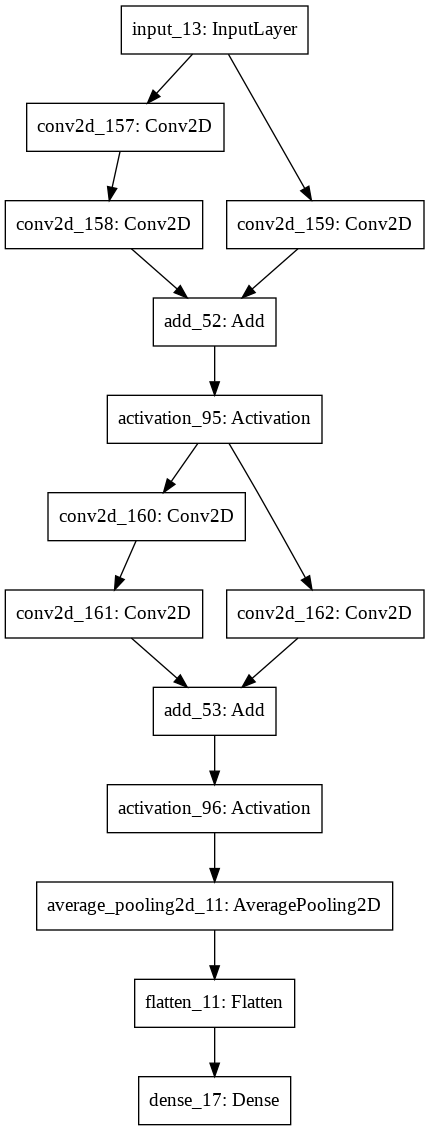

In [0]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, add, AveragePooling2D, Input
from keras.utils import plot_model

def add_bottleneck(X, channel_count):
    X_skip = X
    stride_val = 1
    X_out = Conv2D(channel_count, (3, 3), strides = stride_val, padding='same', activation='relu')(X)
    X_out = Conv2D(channel_count, (3, 3), padding='same')(X_out)
    X_skip = Conv2D(channel_count, (3, 3), strides = stride_val, padding='same')(X_skip)
    out = add([X_out, X_skip])
    out = Activation('relu')(out)
    return out
    
input_x = Input(shape=(32, 32, 3))
X = add_bottleneck(input_x, 8)
X = add_bottleneck(X, 16)
X = AveragePooling2D((2, 2))(X)
X = Flatten()(X)
X = Dense(10, activation='softmax')(X)
# Create model
model = Model(inputs = input_x, outputs = X, name='my_network')

# model.summary()

plot_model(model, to_file='model.png')